In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import feature_selection, linear_model, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# read csv (google collab)
# data_url = "/content/gdrive/MyDrive/UNI/Big Data Problem/Manhattan12.csv"
# df = pd.read_csv(data_url, header = 4)
# df.shape

In [3]:
# read csv (vs code/ python notebook)
# header is defined so that text at top of csv is skipped
df = pd.read_csv("Manhattan12.csv", header = 4)
df.shape

(27395, 21)

In [4]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


## Part 1


Preparing data (using aggressive approach)

In [5]:
df = df.rename(columns={"SALE\nPRICE":"SALE PRICE", "APART\nMENT\nNUMBER":"APARTMENT NUMBER"}) #rename columns

In [6]:
def price_to_int(column):
    df[column] = df[column].str.replace(',','', regex=True).str.replace('$','', regex=True).astype('int')
    
price_to_int('SALE PRICE')
price_to_int('LAND SQUARE FEET')
price_to_int('GROSS SQUARE FEET')

In [7]:
# list all numerical variables 
df_nums = df.select_dtypes(include=[np.number])
list(df_nums)

['BOROUGH',
 'BLOCK',
 'LOT',
 'ZIP CODE',
 'COMMERCIAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'SALE PRICE']

In [8]:
# list all categorical values
df_cat = df.select_dtypes(include=[object])
list(df_cat)

['NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'RESIDENTIAL UNITS',
 'TOTAL UNITS',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE DATE']

In [9]:
# convert sale date to datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], dayfirst=True)

In [10]:
# still doesn't work
# df = df.replace('^\s+', np.nan, regex=True)

In [11]:
# replace 0 with NaN
df.replace(0, np.nan, inplace=True) 
df.replace("0", np.nan, inplace=True)

pd.isnull(df).sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              1
RESIDENTIAL UNITS                 16372
COMMERCIAL UNITS                  23962
TOTAL UNITS                        9704
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                         6441
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         7593
SALE DATE                             0
dtype: int64

In [12]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,27395.0,27395.000000,27395.000000,27394.000000,3433.000000,4489.000000,4.326000e+03,20954.000000,27395.000000,1.980200e+04
mean,1.0,1109.666728,741.789086,10029.226217,2.992426,5893.466028,6.061620e+04,1953.080557,2.488118,2.556609e+06
std,0.0,465.994469,819.422424,34.966983,12.689861,7884.729624,8.111694e+04,37.692641,0.891723,1.916295e+07
min,1.0,7.000000,1.000000,10001.000000,1.000000,200.000000,2.530000e+02,1000.000000,1.000000,1.000000e+00
25%,1.0,877.000000,37.000000,10016.000000,1.000000,2104.000000,6.198500e+03,1920.000000,2.000000,3.676662e+05
50%,1.0,1047.000000,1007.000000,10019.000000,2.000000,5046.000000,2.337150e+04,1955.000000,2.000000,7.400000e+05
75%,1.0,1411.000000,1233.000000,10027.000000,2.000000,7532.000000,1.128500e+05,1987.000000,4.000000,1.627399e+06
max,1.0,2250.000000,9117.000000,10463.000000,604.000000,213650.000000,1.970736e+06,2013.000000,4.000000,1.307965e+09


In [13]:
df = df.drop(columns=['BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER'])

In [14]:
# finding out how many dupliactes there are by subtracting duplicates from 'drop duplicates' from entire dataframe
len(df)-len(df.drop_duplicates())

1593

In [15]:
df.drop_duplicates(keep=False, inplace=True)

df.shape

(25072, 18)

In [16]:
# dropping null values
df = df.dropna()

In [17]:
def boxplot(column):
    sns.boxplot(x=df[column])
    plt.show()

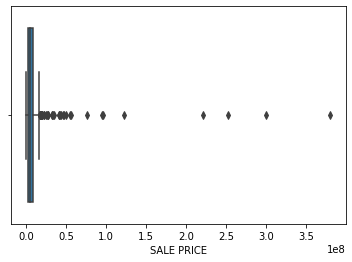

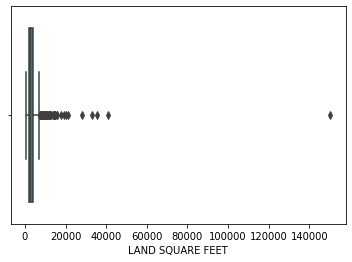

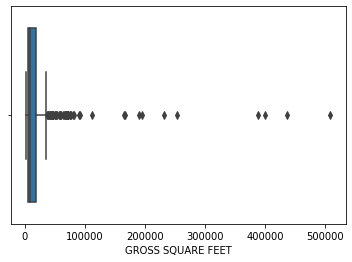

In [18]:
# identifying outliers
boxplot('SALE PRICE')
boxplot('LAND SQUARE FEET')
boxplot('GROSS SQUARE FEET')

<AxesSubplot:xlabel='YEAR BUILT', ylabel='Count'>

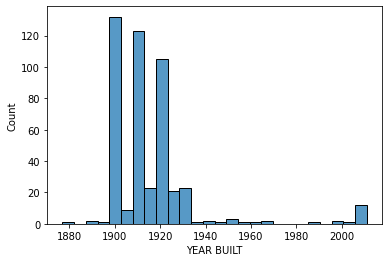

In [19]:
sns.histplot(data=df, x="YEAR BUILT")

In [20]:
def remove_outliers(df, column):
    q_low = df[column].quantile(0.05)
    q_hi  = df[column].quantile(0.95)

    df = df[(df[column] < q_hi) & (df[column] > q_low)]

    return df

In [21]:
df = remove_outliers(df, 'SALE PRICE')
df = remove_outliers(df, 'LAND SQUARE FEET')
df = remove_outliers(df, 'GROSS SQUARE FEET')

In [22]:
df.shape

(339, 18)

In [23]:
# log of sale prices
df['LN SALE PRICE'] = np.log(df['SALE PRICE'])

In [24]:
def normalise(df):
    num_cols=df.select_dtypes(include=[np.number]).copy()
    df_norm=((num_cols-num_cols.min())/(num_cols.max()-num_cols.min()))
    return df_norm

df_norm=normalise(df)

In [25]:
df_norm.head()

,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,LN SALE PRICE
26,0.173952,0.063492,0.017316,0.111111,0.413839,0.564001,0.360902,0.333333,0.573118,0.857428
30,0.174403,0.103175,0.017316,0.222222,0.561303,0.543049,0.172932,0.333333,0.149141,0.529639
31,0.175304,0.109127,0.017316,0.000000,0.217333,0.134386,0.172932,0.333333,0.308453,0.702504
32,0.175304,0.111111,0.017316,0.000000,0.217333,0.130563,0.172932,0.333333,0.308453,0.702504
33,0.175304,0.113095,0.017316,0.000000,0.217333,0.139547,0.172932,0.333333,0.308453,0.702504


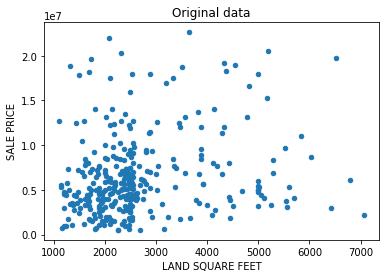

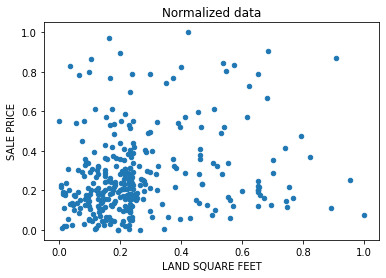

In [26]:
df.plot.scatter(x="LAND SQUARE FEET",y="SALE PRICE", title="Original data")
plt.show()
df_norm.plot.scatter(x="LAND SQUARE FEET", y="SALE PRICE", title="Normalized data")
plt.show()

In [27]:
df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,LN SALE PRICE
26,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,397,33,C7,14 AVENUE B,10009.0,25,2.0,27,3574.0,18212.0,1925.0,2,C7,13185684.0,2013-01-31,16.394642
30,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,398,53,C7,170 EAST 2ND STREET,10009.0,36,3.0,39,4452.0,17664.0,1900.0,2,C7,3810602.0,2012-10-26,15.153298
31,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,56,C4,203 EAST 4TH STREET,10009.0,10,1.0,10,2404.0,6975.0,1900.0,2,C4,7333333.0,2013-04-09,15.807941
32,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,57,C4,201 EAST 4TH STREET,10009.0,9,1.0,9,2404.0,6875.0,1900.0,2,C4,7333333.0,2013-04-09,15.807941
33,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,58,C4,199 EAST 4TH STREET,10009.0,9,1.0,10,2404.0,7110.0,1900.0,2,C4,7333333.0,2013-04-09,15.807941


Data Exploration

In [28]:
def line_plot(df, x, y):
    sns.lineplot(data=df, x=x, y=y)
    plt.show()

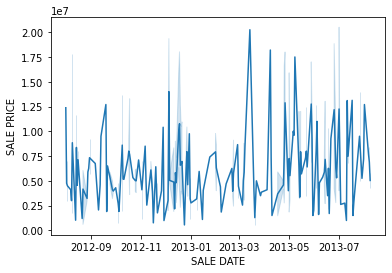

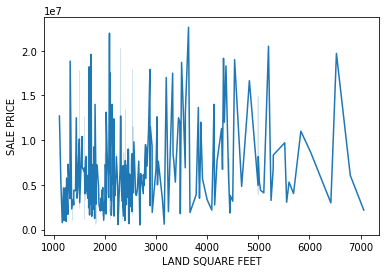

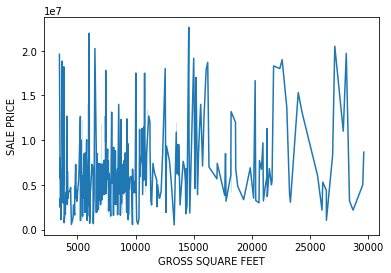

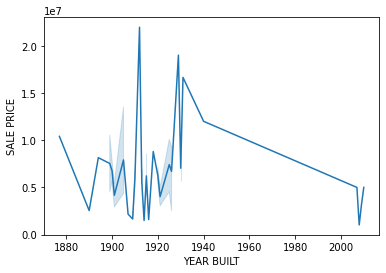

In [29]:
line_plot(df, 'SALE DATE', 'SALE PRICE')

line_plot(df, 'LAND SQUARE FEET', 'SALE PRICE')

line_plot(df, 'GROSS SQUARE FEET', 'SALE PRICE')

line_plot(df, 'YEAR BUILT', 'SALE PRICE')

<AxesSubplot:xlabel='NEIGHBORHOOD', ylabel='SALE PRICE'>

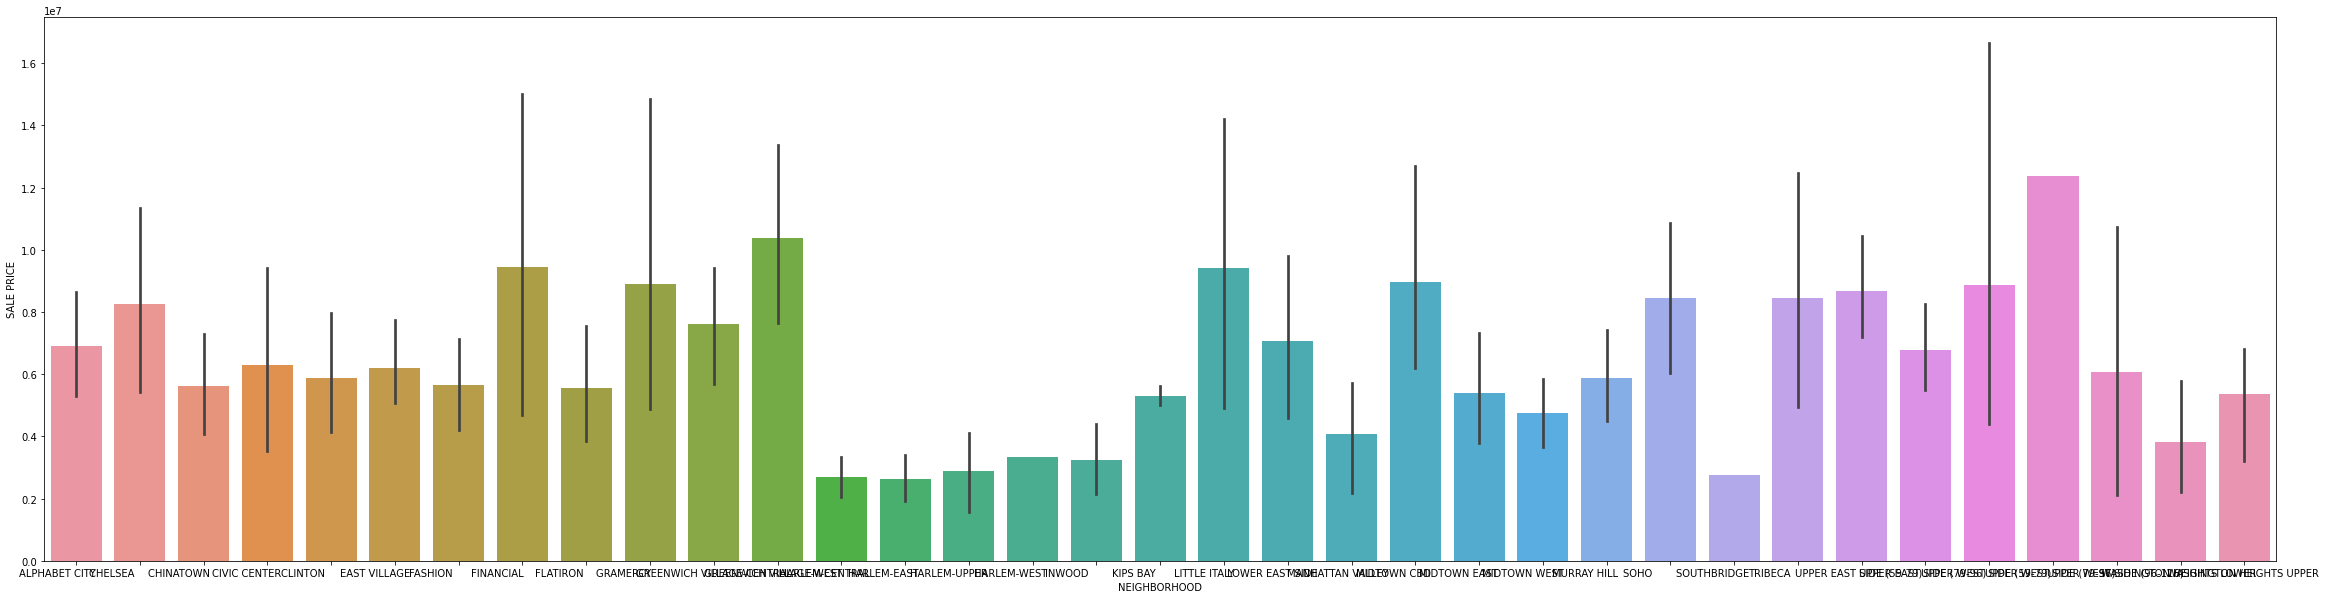

In [30]:
plt.figure(figsize=(40,10))
sns.barplot(data=df, x="NEIGHBORHOOD", y="SALE PRICE")

<AxesSubplot:xlabel='BUILDING CLASS AT TIME OF SALE', ylabel='SALE PRICE'>

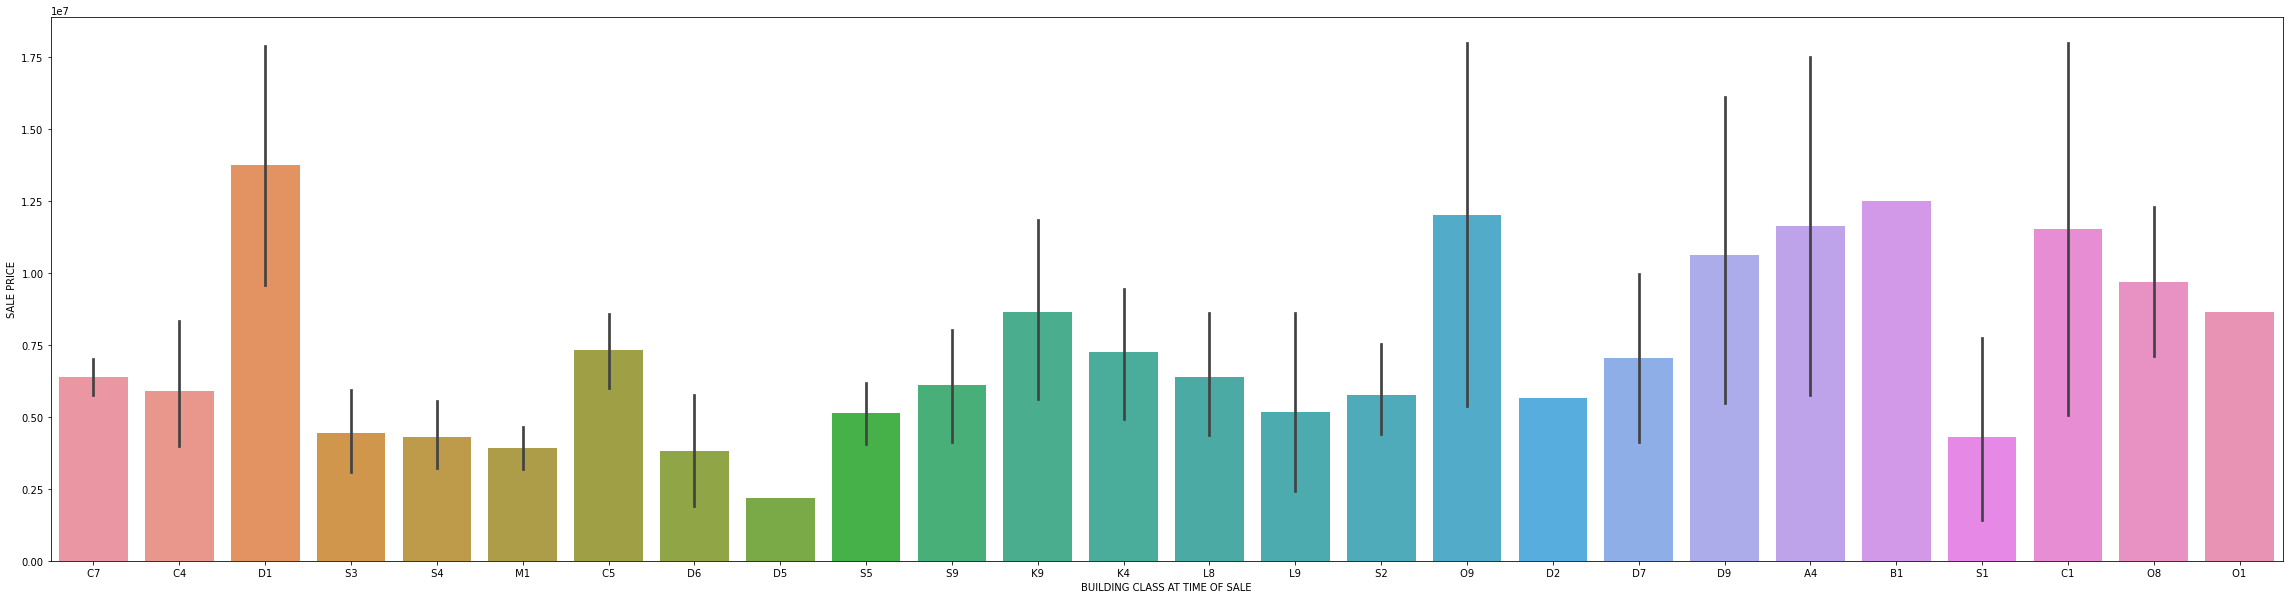

In [31]:
plt.figure(figsize=(40,10))
sns.barplot(data=df, x="BUILDING CLASS AT TIME OF SALE", y="SALE PRICE")

<AxesSubplot:xlabel='SALE DATE', ylabel='SALE PRICE'>

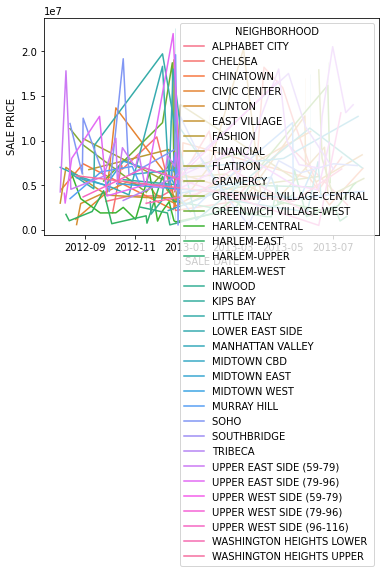

In [39]:
# change so that it's a seperate graph for each neighbourhood
sns.lineplot(data=df, x="SALE DATE", y="SALE PRICE", hue="NEIGHBORHOOD")

In [43]:
neighbourhoods = df['NEIGHBORHOOD'].unique()

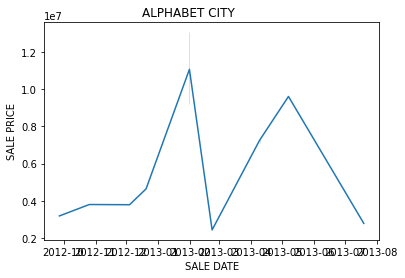

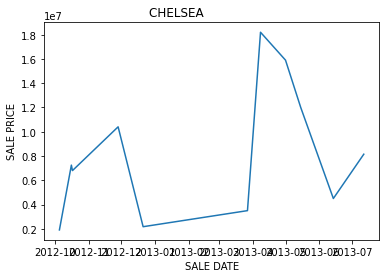

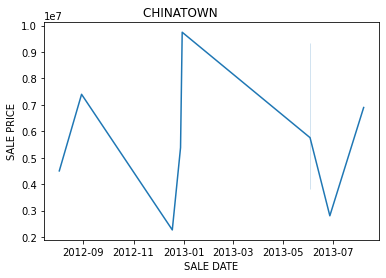

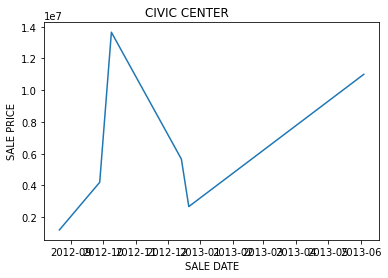

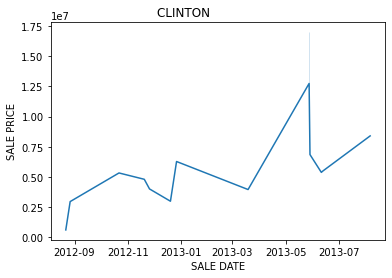

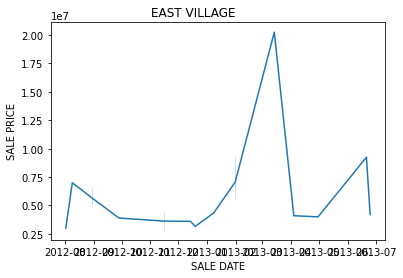

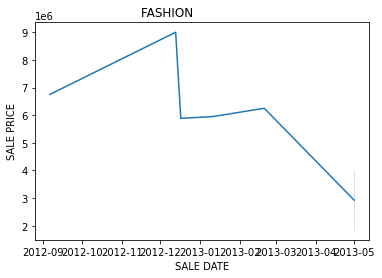

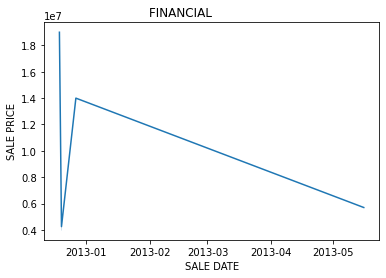

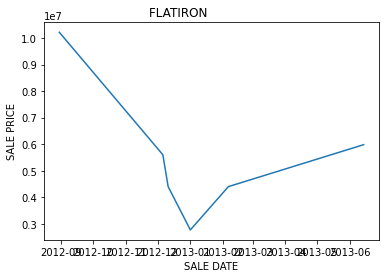

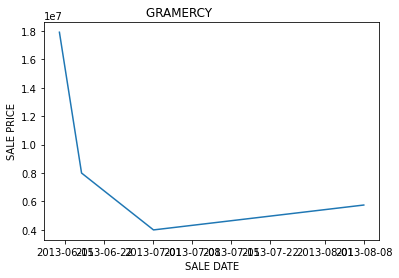

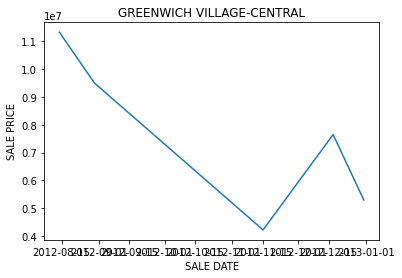

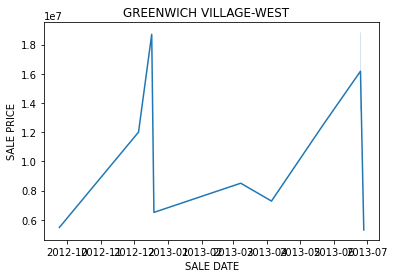

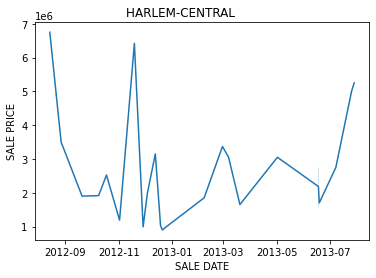

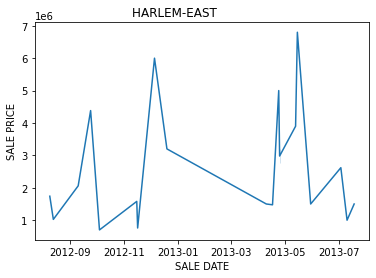

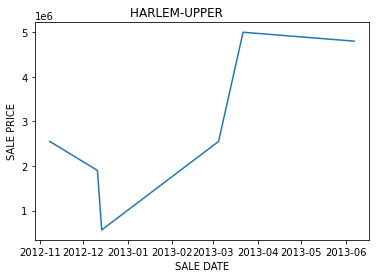

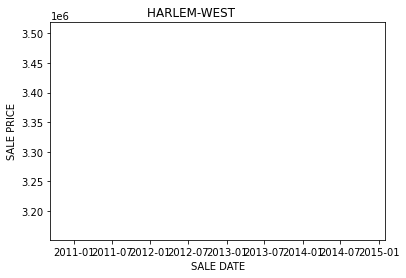

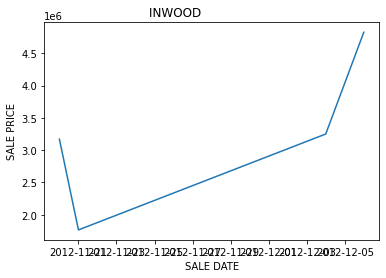

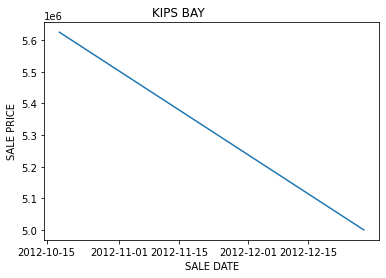

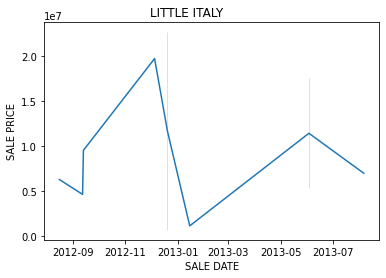

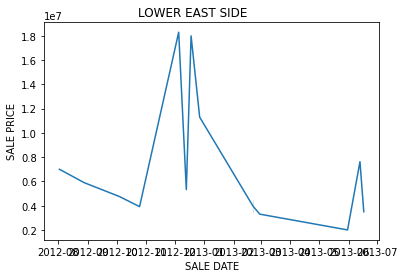

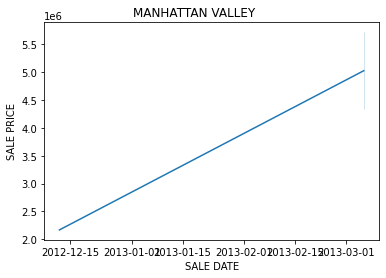

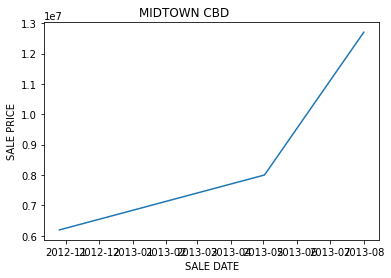

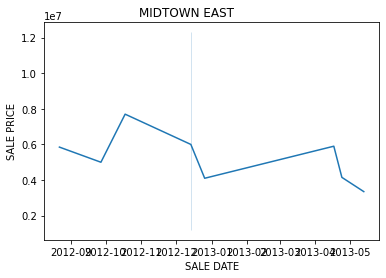

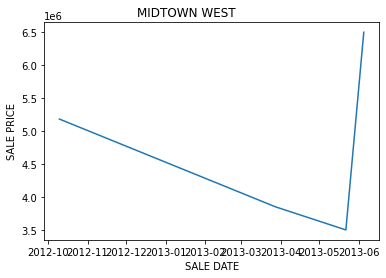

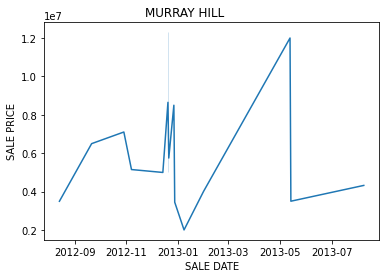

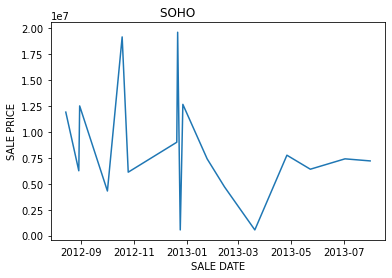

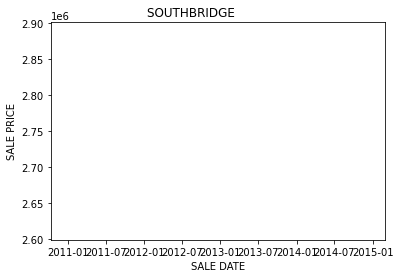

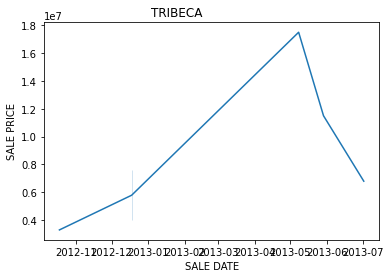

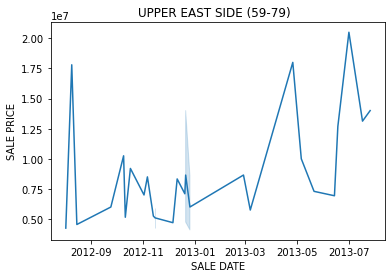

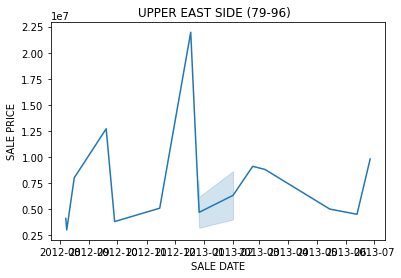

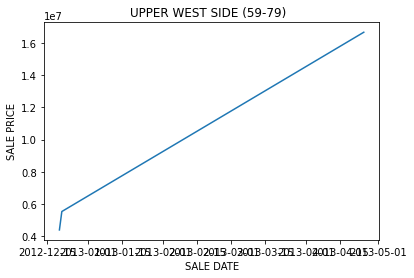

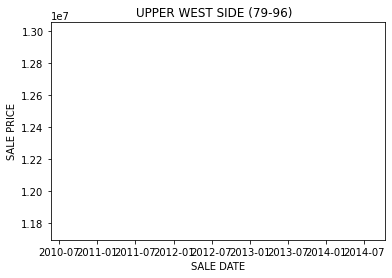

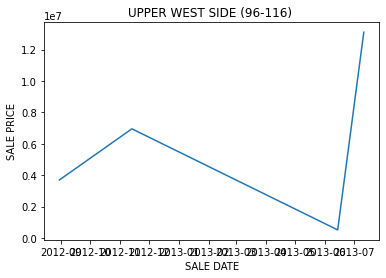

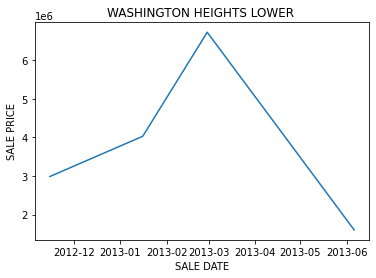

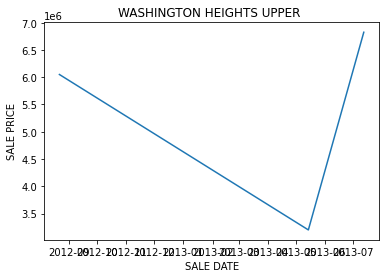

In [48]:
def neighbourhood_price_date(df, neighbourhood):
    this_neighbourhood = df.query(" NEIGHBORHOOD == " + "'" + neighbourhood + "'")
    sns.lineplot(data=this_neighbourhood, x="SALE DATE", y="SALE PRICE").set(title=neighbourhood)
    plt.show()


for i in neighbourhoods:
    neighbourhood_price_date(df, i)

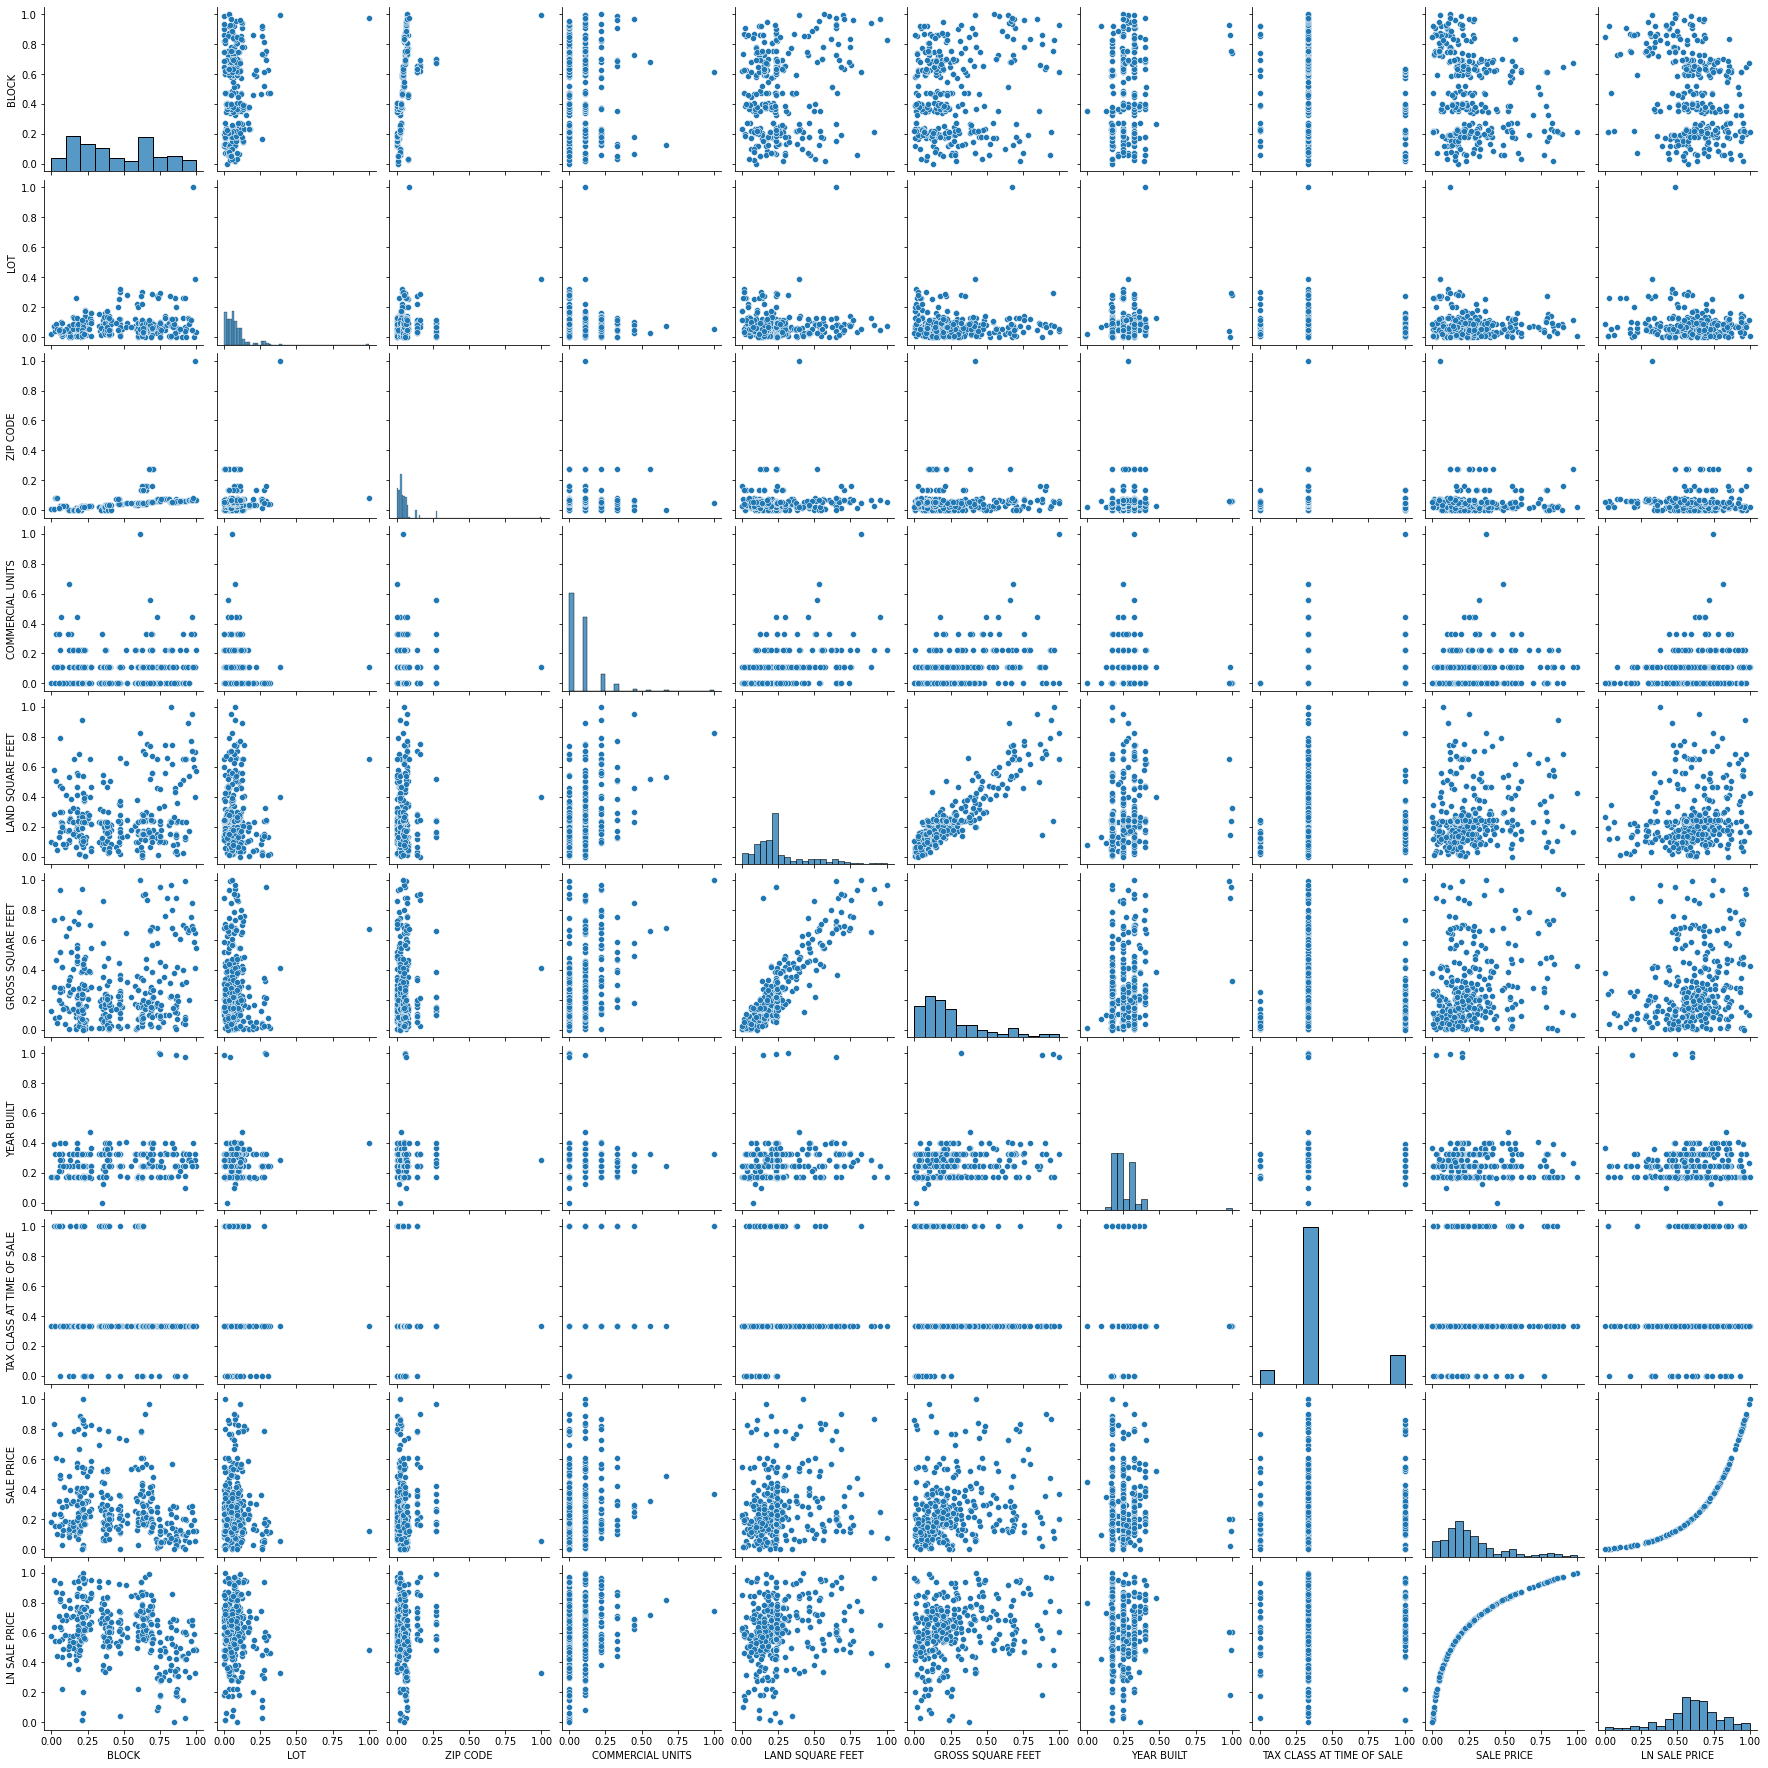

In [38]:
sns.pairplot(df_norm)

Model Building

In [ ]:
clf = LogisticRegression(solver='saga', max_iter=10000)
feature_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET','YEAR BUILT']

X = df[feature_columns]
Y = df['SALE PRICE']


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

clf.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [ ]:
scores = model_selection.cross_val_score(clf, X, Y, scoring='accuracy', cv=3)
print("Cross validation mean scores: {}".format(scores.mean()))

C:\Users\rana1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Cross validation mean scores: 0.008849557522123894


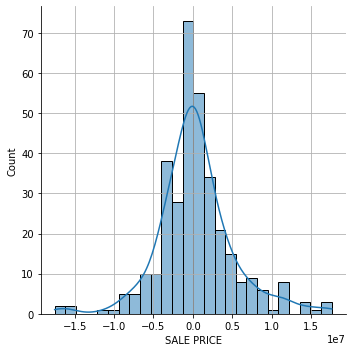

In [ ]:
pred_Y= clf.predict(X)

res = Y - pred_Y
sns.displot(res, kde=True)
plt.grid()